In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [37]:
df = pd.read_excel('Red_wine.xlsx')
print(df.head())
print(df.info())
print(df.describe().T)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

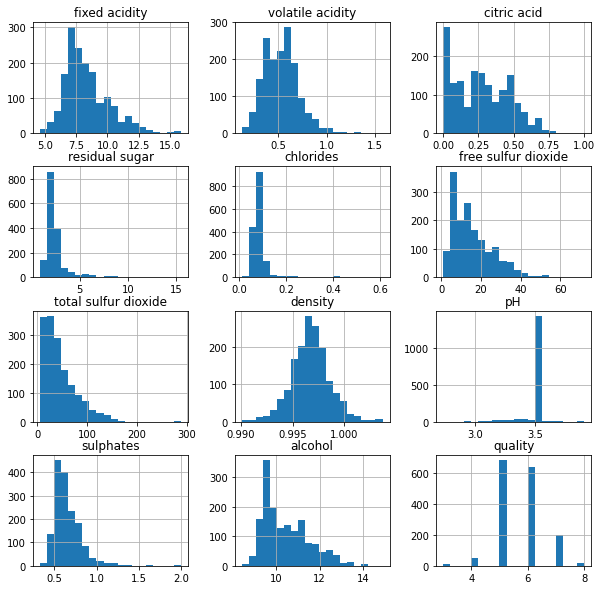

In [38]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

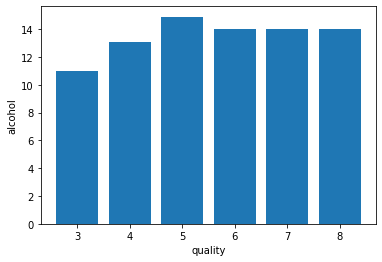

In [39]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

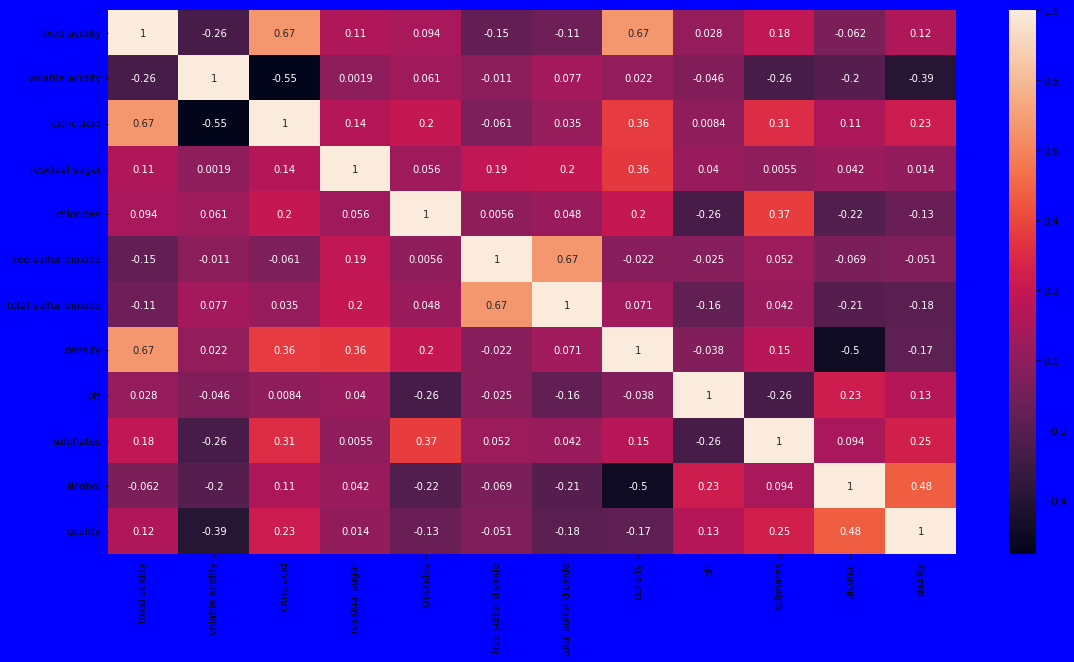

In [40]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

In [41]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [42]:
df.update(df.fillna(df.mean()))
df.isnull().sum().sum()

0

In [44]:
# catogerical vars 
df = pd.get_dummies(df,drop_first=True)
# display new dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [45]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0,0


In [48]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((1279, 11), (320, 11))

In [53]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [67]:
rnd = RandomForestClassifier()
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'),rnd]

for i in range(4):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()


LogisticRegression() : 
Training Accuracy :  0.7456383208702232
Validation Accuracy :  0.7706146042231921

XGBClassifier() : 
Training Accuracy :  0.8469887095030806
Validation Accuracy :  0.8002044748535253

SVC() : 
Training Accuracy :  0.7692031798127094
Validation Accuracy :  0.7716369784908181

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.8413550391254768



LogisticRegression() : 


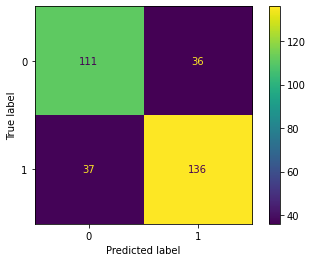

XGBClassifier() : 


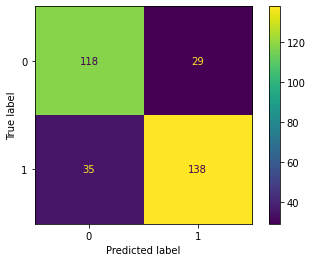

SVC() : 


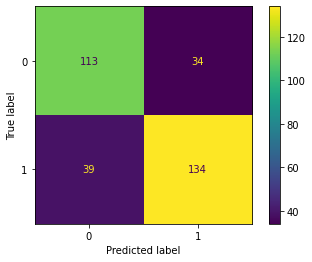

RandomForestClassifier() : 


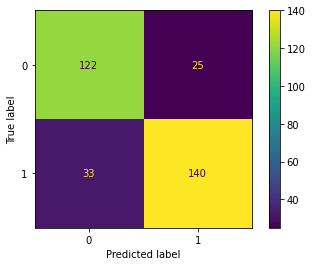

In [81]:
for i in range(4):
  print(f'{models[i]} : ')
  metrics.plot_confusion_matrix(models[i], xtest, ytest)
  plt.show()

In [83]:
for i in range(4):
  print(f'{models[i]} : ')
  print(metrics.classification_report(ytest,
									models[1].predict(xtest)))


LogisticRegression() : 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       147
           1       0.83      0.80      0.81       173

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

XGBClassifier() : 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       147
           1       0.83      0.80      0.81       173

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

SVC() : 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       147
           1       0.83      0.80      0.81       173

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.8

In [86]:
for i in range(4):
  print(f'{models[i]} : ')
  x_predict = list(models[i].predict(xtest))
  predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
  #creating new dataframe
  print(pd.DataFrame(predicted_df).head(20))

LogisticRegression() : 
      predicted_values  original_values
1035                 1                1
49                   0                0
799                  1                1
538                  1                1
660                  1                1
990                  0                0
398                  1                1
1068                 1                1
1155                 0                0
468                  0                1
1377                 1                1
1345                 1                1
494                  1                1
1167                 1                1
1387                 0                0
1323                 1                1
1030                 1                1
517                  0                0
176                  0                0
1551                 0                0
XGBClassifier() : 
      predicted_values  original_values
1035                 1                1
49                   0               